In [1]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Read data from csv file
headers = ['Pregnancy Count', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Has Diabetes']
data=pd.read_csv("/content/Pima.csv",names=headers)

In [4]:
# Print the dimensions of the dataset
data.shape

(768, 9)

In [5]:
# Describe the dataset
data.describe()

,Pregnancy Count,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Has Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


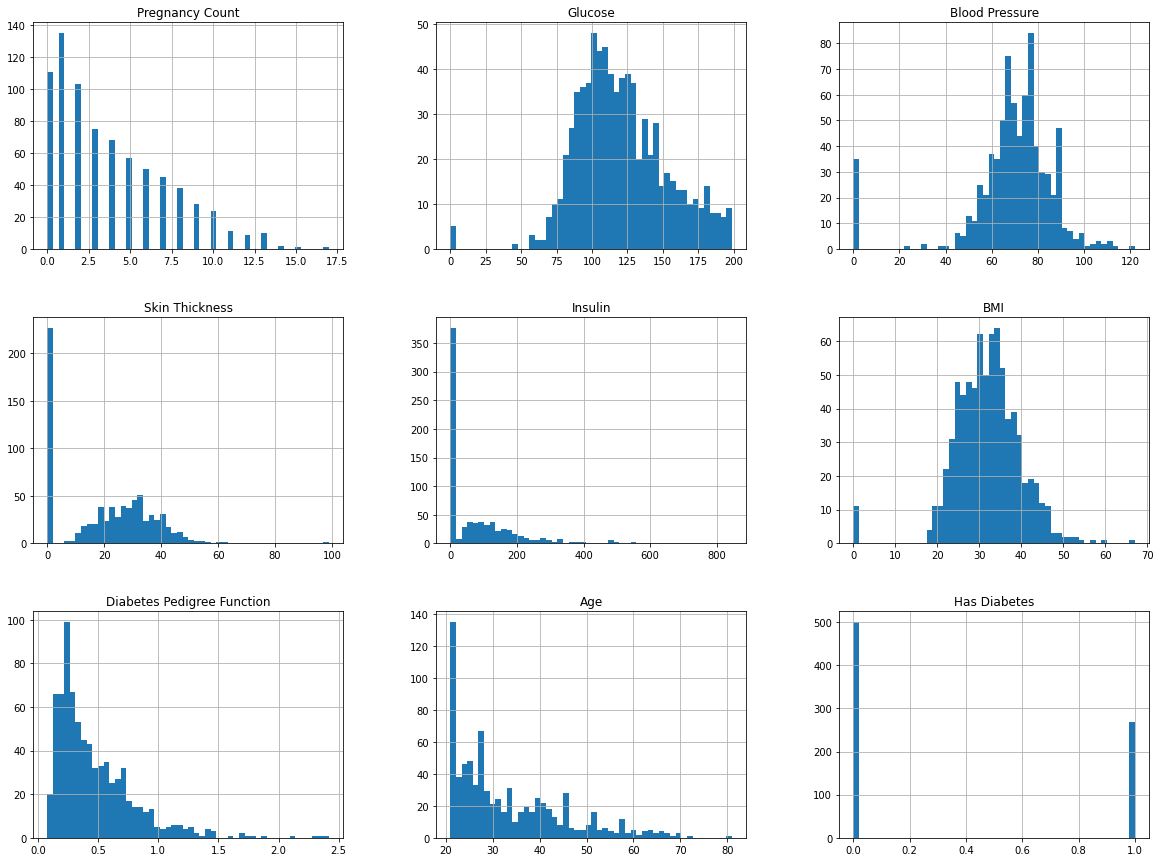

In [6]:
# Plot histograms of each feature
data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Seperate the dataset into training and testing set (80% training and 20% testing)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
trainingSet,testingSet=train_test_split(data,test_size=0.20,random_state=0)

In [8]:
# Remove the outcome column from the dataset
trainingSetLabels=trainingSet["Has Diabetes"].copy()
trainingSet=trainingSet.drop("Has Diabetes", axis=1)

testingSetLabels=testingSet["Has Diabetes"].copy()
testingSet=testingSet.drop("Has Diabetes",axis=1)

In [9]:
# Dimensions of training set
trainingSet.shape

(614, 8)

In [10]:
# Dimensions of testing set
testingSet.shape

(154, 8)

In [11]:
# Initialize classifier and train it on the training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB();
classifier.fit(trainingSet,trainingSetLabels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
# Predict the result of testing data
predictedValues=classifier.predict(testingSet);
len(predictedValues)

154

In [13]:
# Calculate the accuracy of the predicted values
accuracy=accuracy_score(testingSetLabels,predictedValues)
print(accuracy)

0.7922077922077922
